# Lista 3

## Ćwiczenie 6
Plik $dane\_wino.txt$ zawiera dane dotyczące koncentracji trzynastu różnych substancji chemicznych zawartych w winie pochodzącym z jednego regionu Włoch, ale z trzech różnych upraw. Zmienna $V1$ jest indeksem ze zbioru $\{1, 2, 3\}$ oznaczającym trzy typy uprawy. Zmienne $V2$ do $V14$ oznaczają poziomy koncentracji kolejnych substancji chemicznych. Dla tych danych przyjmij, że prawdopodobieństwa a priori przynależności do klas są równe $1 \over 3$. Odpowiedz na pytania i)-ix) z powyższego zadania.

In [1]:
# wczytanie pakietu
library(MASS)
# wczytanie danych
wino = read.table("dane_wino.txt", sep = ",")
# wyswietlenie pierwszych 6 wierszy naszych danych
head(wino)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [2]:
# wypisanie liczby wierszy i kolumn
paste("Liczba wierszy:", dim(wino)[1], "; Liczba kolumn:", dim(wino)[2])

[1] "Liczba wierszy: 178 ; Liczba kolumn: 14"

In [3]:
# utworzenie liniowego modelu zaleznosci typu uprawy od koncentracji substancji chemicznych w winie
model_lda_6 = lda(V1 ~ ., data = wino, prior = c(1/3, 1/3, 1/3))
model_lda_6

Call:
lda(V1 ~ ., data = wino, prior = c(1/3, 1/3, 1/3))

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
        V2       V3       V4       V5       V6       V7        V8       V9
1 13.74475 2.010678 2.455593 17.03729 106.3390 2.840169 2.9823729 0.290000
2 12.27873 1.932676 2.244789 20.23803  94.5493 2.258873 2.0808451 0.363662
3 13.15375 3.333750 2.437083 21.41667  99.3125 1.678750 0.7814583 0.447500
       V10      V11       V12      V13       V14
1 1.899322 5.528305 1.0620339 3.157797 1115.7119
2 1.630282 3.086620 1.0562817 2.785352  519.5070
3 1.153542 7.396250 0.6827083 1.683542  629.8958

Coefficients of linear discriminants:
             LD1          LD2
V2  -0.356369042  0.892051370
V3   0.181293364  0.296139458
V4  -0.243541326  2.362184415
V5   0.146777356 -0.154421898
V6  -0.002185082 -0.000346807
V7   0.615457266 -0.065102824
V8  -1.685049247 -0.402774674
V9  -1.580605983 -1.548924728
V10  0.117537507 -0.313796985


In [4]:
# liczbnosci grup poszczegolnych typow uprawy
model_lda_6$count

1  2  3 
59 71 48

#### i) Jakie są średnie wartości w grupach?

In [5]:
# tabela srednich wartosci koncentracji substancji chemicznych w winie dla poszczegolnych typow uprawy
model_lda_6$mean

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,13.74475,2.010678,2.455593,17.03729,106.3390,2.840169,2.9823729,0.290000,1.899322,5.528305,1.0620339,3.157797,1115.7119
2,12.27873,1.932676,2.244789,20.23803,94.5493,2.258873,2.0808451,0.363662,1.630282,3.086620,1.0562817,2.785352,519.5070
3,13.15375,3.333750,2.437083,21.41667,99.3125,1.678750,0.7814583,0.447500,1.153542,7.396250,0.6827083,1.683542,629.8958


Średnie wartości w grupach określonych substancji chemicznych przedstawione są również powyżej w części modelu $Group\ means$. Wynoszą one kolejno dla upraw ze zbiorów 1, 2 i 3:
- $V2$: 13.74475, 12.27873, 13.15375
- $V3$: 2.010678, 1.932676, 3.333750
- $V4$: 2.455593, 2.244789, 2.437083
- $V5$: 17.03729, 20.23803, 21.41667
- $V6$: 106.3390, 94.5493, 99.3125
- $V7$: 2.840169, 2.258873, 1.678750
- $V8$: 2.9823729, 2.0808451, 0.7814583
- $V9$: 0.290000, 0.363662, 0.447500
- $V10$: 1.899322, 1.630282, 1.153542
- $V11$: 5.528305, 3.086620, 7.396250
- $V12$: 1.0620339, 1.0562817, 0.6827083
- $V13$: 3.157797, 2.785352, 1.683542
- $V14$: 1115.7119, 519.5070, 629.8958

#### ii) Jakie są wartości współczynników funkcji dyskryminacyjnych?

Wartości współczynników funkcji dyskryminacyjnych przedstawione są również powyżej w części modelu $Coefficients\ of\ linear\ discriminants$. Wynoszą one kolejno dla pierwszej ($LD1$) i drugiej ($LD2$) funkcji dyskryminacyjnej:
- $V2$: -0.356369042, 0.892051370
- $V3$: 0.181293364, 0.296139458
- $V4$: -0.243541326, 2.362184415
- $V5$: 0.146777356, -0.154421898
- $V6$: -0.002185082, -0.000346807
- $V7$: 0.615457266, -0.065102824
- $V8$: -1.685049247, -0.402774674
- $V9$: -1.580605983, -1.548924728
- $V10$: 0.117537507, -0.313796985
- $V11$: 0.368045785, 0.233950076
- $V12$: -0.897641355, -1.469888074
- $V13$: -1.153187021, 0.11279717
- $V14$: -0.002535348, 0.002992344

#### iii) Dla każdej z funkcji dyskryminacyjnych określ która ze zmiennych objaśniających jest najbardziej istotna.

Dla pierwszej funkcji dyskryminacyjnej ($LD1$) najbardziej istotną zmienną objaśniającą jest $V7$, natomiast dla drugiej funkcji dyskryminacyjnej ($LD2$) najbardziej istotną zmienną objaśniającą jest $V4$.

#### iv) Jakie są średnie wartości funkcji dyskryminacyjnych w każdej z grup?

In [6]:
# predykcja wartosci na podstawie naszego modelu
predykcja_6 = predict(model_lda_6)$x[, 1]
# srednia wartosc funkcji dyskryminacyjnej dla 1. typu uprawy
grupa_1 = sum(predykcja_6 * (wino$V1 == 1)) / sum(wino$V1 == 1)
grupa_1
# srednia wartosc funkcji dyskryminacyjnej dla 2. typu uprawy
grupa_2 = sum(predykcja_6 * (wino$V1 == 2)) / sum(wino$V1 == 2)
grupa_2
# srednia wartosc funkcji dyskryminacyjnej dla 3. typu uprawy
grupa_3 = sum(predykcja_6 * (wino$V1 == 3)) / sum(wino$V1 == 3)
grupa_3

[1] -3.615421

[1] -0.4993242

[1] 4.114745

Średnia wartość funkcji dyskryminacyjnej dla pierwszego typu uprawy wynosi: -3.61542106819119, dla drugiego typu uprawy: -0.499324220000884, a dla trzeciego typu uprawy: 4.11474528819207.

#### v) Przeprowadź predykcję przynależności do klas na zbiorze testowym.

In [7]:
# predykcja przenaleznosci do klas
predict(model_lda_6)$class

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

#### vi) Jakie są prawdopodobieństwa przynależności do klas dla dwudziestej obserwacji?

In [8]:
# predykcja przenaleznosci do klas dla dwudziestej obserwacji
predict(model_lda_6)$posterior[20,]

1            2            3 
9.999995e-01 5.095511e-07 8.169387e-13

Prawdopodobieństwa przynależności do klas dla dwudziestej obserwacji wynoszą odpowiednio: 0.999999490448063 dla pierwszego typu uprawy, 5.0955112019153e-07 dla drugiego typu uprawy i 8.16938696145394e-13 dla trzeciego typu uprawy.

#### vii) Do której z klas zostanie zaklasyfikowana ta obserwacja?

In [9]:
# predykcja przenaleznosci do klas dla dwudziestej obserwacji
predict(model_lda_6)$class[20]

[1] 1
Levels: 1 2 3

Obserwacja dwudziesta zaklasyfikowana została do pierwszego typu uprawy.

#### viii) Wyznacz procent właściwie zaklasyfikowanych obiektów.

In [10]:
# utworzenie tabeli predykcji - porownanie wartosci rzeczywistych z otrzymanymi na podstawie modelu
tabela_predykcji_6 = table(True = wino$V1, Predicted = predict(model_lda_6)$class)

In [11]:
# procent niepoprawnie zaklasyfikowanych obiektow
blad_6 = (sum(tabela_predykcji_6) - sum(diag(tabela_predykcji_6))) / sum(tabela_predykcji_6) * 100
blad_6

[1] 0

In [12]:
# procent poprawnie zaklasyfikowanych obiektow
poprawne_6 = 100 - blad_6
poprawne_6

[1] 100

Wszystkie obserwacje zostały poprawnie zaklasyfikowane na podstawie modelu liniowego.

#### ix) Przedstaw i skomentuj tabelę predykcji.

In [13]:
# przedstawienie tabeli predykcji
tabela_predykcji_6

    Predicted
True  1  2  3
   1 59  0  0
   2  0 71  0
   3  0  0 48

Wszystkie obserwacje na podstawie modelu liniowego zostały zaklasyfikowane do grup takich, w jakich znajdują się w rzeczywistości.

# Lista 4

## Ćwiczenie 7
Plik $urine.txt$ zawiera dane dotyczące obecności kryształów oraz innych właściwości moczu. W danych znajdują się następujące zmienne:
- $pres$ - obecność kryształów (0 - brak, 1 - obecność)
- $gravity$ - ciężar właściwy
- $ph$ - wartość współczynnika pH
- $osmo$ - osmolarność moczu
- $conduct$ - przewodnictwo
- $urea$ - stężenie mocznika
- $calc$ - stężenie wapnia

Dla tych danych wykonaj polecenia z powyższego ćwiczenia. Dla wyznaczenia zbioru uczącego wybierz losowo 50 obserwacji ze zbioru danych, pozostałe traktując jako zbiór testowy.

In [14]:
# wczytanie danych z naglowkami
mocz = read.table("urine.txt", header = TRUE, sep = ",")
# wyswietlenie pierwszych wierszy naszych danych
head(mocz)

,X.,pres,gravity,ph,osmo,cond,urea,calc
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,1,0,1.021,4.91,725,NA,443,2.45
2,2,0,1.017,5.74,577,20.0,296,4.49
3,3,0,1.008,7.20,321,14.9,101,2.36
4,4,0,1.011,5.51,408,12.6,224,2.15
5,5,0,1.005,6.52,187,7.5,91,1.16
6,6,0,1.020,5.27,668,25.3,252,3.34


#### i) Dokonaj podziału obserwacji na podzbiór uczący (losowe 50 obserwacji) oraz zbiór testowy (pozostałe).

In [15]:
# liczba obserwacji w zbiorze danych
obserwacje_7 = nrow(mocz)
obserwacje_7

[1] 79

In [16]:
# wybranie losowych 50 obserwacji
#losowe_obserwacje_7 = sort(sample(1:79, 50, replace = FALSE))

Obserwacje zostały wylosowane wcześniej, aby przy każdym puszczaniu gotowego kodu próby ucząca i testowa miały identyczną zawartość, która wpływa na kolejne, wykonane poniżej kroki.

In [17]:
# wektor losowych obserwacji
losowe_obserwacje_7 = c(2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 27, 29, 31, 33, 34, 37, 39, 40, 41, 42, 47, 48, 49, 50, 51, 55, 56, 57, 58, 59, 60, 61, 63, 65, 67, 69, 73, 74, 75, 76, 77, 79)

In [18]:
# przygotowanie i wyswietlenie podzbioru uczacego
podzbior_uczacy_7 = mocz[losowe_obserwacje_7, -1]
podzbior_uczacy_7

,pres,gravity,ph,osmo,cond,urea,calc
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
2,0,1.017,5.74,577,20.0,296,4.49
4,0,1.011,5.51,408,12.6,224,2.15
5,0,1.005,6.52,187,7.5,91,1.16
7,0,1.012,5.62,461,17.4,195,1.40
8,0,1.029,5.67,1107,35.9,550,8.48
9,0,1.015,5.41,543,21.9,170,1.16
10,0,1.021,6.13,779,25.7,382,2.21
12,0,1.025,5.53,907,28.4,448,1.27
13,0,1.006,7.12,242,11.3,64,1.03


In [19]:
# przygotowanie i wyswietlenie podzbioru testowego
podzbior_testowy_7 = mocz[-losowe_obserwacje_7, -1]
podzbior_testowy_7

,pres,gravity,ph,osmo,cond,urea,calc
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0,1.021,4.91,725,NA,443,2.45
3,0,1.008,7.20,321,14.9,101,2.36
6,0,1.020,5.27,668,25.3,252,3.34
11,0,1.011,6.19,345,11.5,152,1.93
15,0,1.011,5.21,450,17.9,161,1.53
17,0,1.007,6.63,253,8.4,133,1.05
25,0,1.023,5.68,749,29.0,239,1.52
26,0,1.017,6.76,455,8.8,270,0.77
28,0,1.010,6.61,225,9.8,72,0.17


#### ii) Dopasuj model regresji logistycznej bazując na podzbiorze uczącym.

In [20]:
# wykonanie modelu regresji logistycznej
model_log_7_1 = glm(pres ~ ., data = podzbior_uczacy_7, family = binomial())
# podsumowanie modelu regresji logistycznej
summary(model_log_7_1)


Call:
glm(formula = pres ~ ., family = binomial(), data = podzbior_uczacy_7)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.17314  -0.29638  -0.04275   0.09328   2.68829  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -856.29153  443.73769  -1.930   0.0536 .
gravity      862.02417  443.59754   1.943   0.0520 .
ph            -1.90207    1.06194  -1.791   0.0733 .
osmo           0.03585    0.03678   0.975   0.3296  
cond          -0.84893    0.55348  -1.534   0.1251  
urea          -0.06953    0.03711  -1.873   0.0610 .
calc           1.06000    0.48077   2.205   0.0275 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.925  on 48  degrees of freedom
Residual deviance: 19.830  on 42  degrees of freedom
  (1 obserwacja została skasowana z uwagi na braki w niej zawarte)
AIC: 33.83

Number of Fisher Scoring iterations: 8


##### Otrzymany model regresji logistycznej:
$\textrm{pres} = {1 \over 1 + exp(-(-856.29153 + 862.02417 \cdot \textrm{gravity} - 1.90207 \cdot \textrm{ph} + 0.03585 \cdot \textrm{osmo} - 0.84893 \cdot \textrm{cond} - 0.06953 \cdot \textrm{urea} + 1.06000 \cdot \textrm{calc}))}$

#### iii) Stosując krokową procedurę wyboru modelu zdecyduj, które zmienne powinny pozostać w modelu.

Najwyższą nieistotną statystycznie p-wartość statystyki testowej ma zmienna $osmo$, którą usuwamy z modelu.

In [21]:
# wykonanie modelu regresji logistycznej bez zmiennej osmo
model_log_7_2 = glm(pres ~ . -osmo, data = podzbior_uczacy_7, family = binomial())
# podsumowanie modelu regresji logistycznej bez zmiennej osmo
summary(model_log_7_2)


Call:
glm(formula = pres ~ . - osmo, family = binomial(), data = podzbior_uczacy_7)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3083  -0.2372  -0.0656   0.1686   2.6513  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.120e+03  4.284e+02  -2.615  0.00892 **
gravity      1.124e+03  4.300e+02   2.615  0.00892 **
ph          -1.598e+00  1.008e+00  -1.585  0.11290   
cond        -3.747e-01  1.779e-01  -2.106  0.03519 * 
urea        -3.989e-02  1.454e-02  -2.744  0.00607 **
calc         9.010e-01  4.261e-01   2.114  0.03449 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.925  on 48  degrees of freedom
Residual deviance: 20.915  on 43  degrees of freedom
  (1 obserwacja została skasowana z uwagi na braki w niej zawarte)
AIC: 32.915

Number of Fisher Scoring iterations: 8


Najwyższą nieistotną statystycznie p-wartość statystyki testowej ma zmienna $ph$, którą usuwamy z modelu.

In [22]:
# wykonanie modelu regresji logistycznej bez zmiennej ph
model_log_7_3 = glm(pres ~ . -ph -osmo, data = podzbior_uczacy_7, family = binomial())
# podsumowanie modelu regresji logistycznej bez zmiennej ph
summary(model_log_7_3)


Call:
glm(formula = pres ~ . - ph - osmo, family = binomial(), data = podzbior_uczacy_7)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1070  -0.2887  -0.0961   0.1434   1.9123  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -986.43984  326.13949  -3.025  0.00249 **
gravity      981.15670  324.72275   3.022  0.00252 **
cond          -0.33621    0.13409  -2.507  0.01217 * 
urea          -0.03345    0.01253  -2.669  0.00761 **
calc           0.87141    0.37295   2.337  0.01946 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.925  on 48  degrees of freedom
Residual deviance: 24.095  on 44  degrees of freedom
  (1 obserwacja została skasowana z uwagi na braki w niej zawarte)
AIC: 34.095

Number of Fisher Scoring iterations: 7


Wszystkie pozostałe zmienne: $gravity$, $cond$, $urea$ i $calc$ (a także wyraz wolny $(Intercept)$) są istotne statystycznie.

#### iv) Skonstruuj klasyfikator w oparciu o próbę uczącą. Przedstaw na rysunku klasyfikację dokonaną przez klasyfikator. Wyznacz błąd klasyfikacji na próbie testowej.

##### Otrzymany model regresji logistycznej po zastosowaniu krokowej procedury wyboru modelu - klasyfikator:
$\textrm{pres} = {1 \over 1 + exp(-(-986.43984 + 981.15670 \cdot \textrm{gravity} - 0.33621 \cdot \textrm{cond} - 0.03345 \cdot \textrm{urea} + 0.87141 \cdot \textrm{calc}))}$

In [23]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru uczacego na podstawie wygenerowanego modelu regresji logistycznej
predykcja_log_podzbior_uczacy_7 = predict(model_log_7_3, newdata = podzbior_uczacy_7, type = "response")
predykcja_log_podzbior_uczacy_7

2           4           5           7           8           9 
0.211599404 0.012802464 0.007162145 0.009364141 0.523546969 0.068889075 
         10          12          13          14          16          18 
0.015212351 0.015066838 0.011676877 0.004590169 0.188344230 0.040809234 
         19          20          21          22          23          24 
0.063332246 0.004607050 0.499658352 0.018797247 0.031480461 0.100698129 
         27          29          31          33          34          37 
0.891370603 0.023127009 0.003619192 0.542378512 0.193222105 0.003559567 
         39          40          41          42          47          48 
0.059421346 0.280249956 0.018353921 0.008010458 0.999986280 0.756427486 
         49          50          51          55          56          57 
0.531088458 0.960097246 0.999999094 0.427272932 0.316092891 0.990500645 
         58          59          60          61          63          65 
0.998586454 0.999999998 0.872685651 0.972017622 0.999899980 0.643247072 
         67          69          73          74          75          76 
0.955824454 0.160662508 0.333483737 0.956796329 0.999890696 0.712634931 
         77          79 
0.989764392 0.999364024

In [24]:
# liczba obserwacji z podzioru uczacego, dla ktorych dokonalismy predykcji
liczba_predykcji_log_podzbior_uczacy_7 = length(predykcja_log_podzbior_uczacy_7)
liczba_predykcji_log_podzbior_uczacy_7

[1] 50

In [25]:
# przygotowanie pustego wektora predykcji dla podzbioru uczacego
wektor_predykcji_log_podzbior_uczacy_7 = rep(0, liczba_predykcji_log_podzbior_uczacy_7)

In [26]:
# zmiany wartosci w wektorze predykcji dla podzbioru uczacego na okreslone wartosci prawdopodobienstwa
wektor_predykcji_log_podzbior_uczacy_7[predykcja_log_podzbior_uczacy_7 > 0.5] = 1
wektor_predykcji_log_podzbior_uczacy_7

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1
[39] 1 1 1 1 1 0 0 1 1 1 1 1

In [27]:
# tabela predykcji dla podzbioru uczacego
tabela_predykcji_log_podzbior_uczacy_7 = table(True = podzbior_uczacy_7$pres, Predicted = wektor_predykcji_log_podzbior_uczacy_7)
tabela_predykcji_log_podzbior_uczacy_7

    Predicted
True  0  1
   0 25  3
   1  4 18

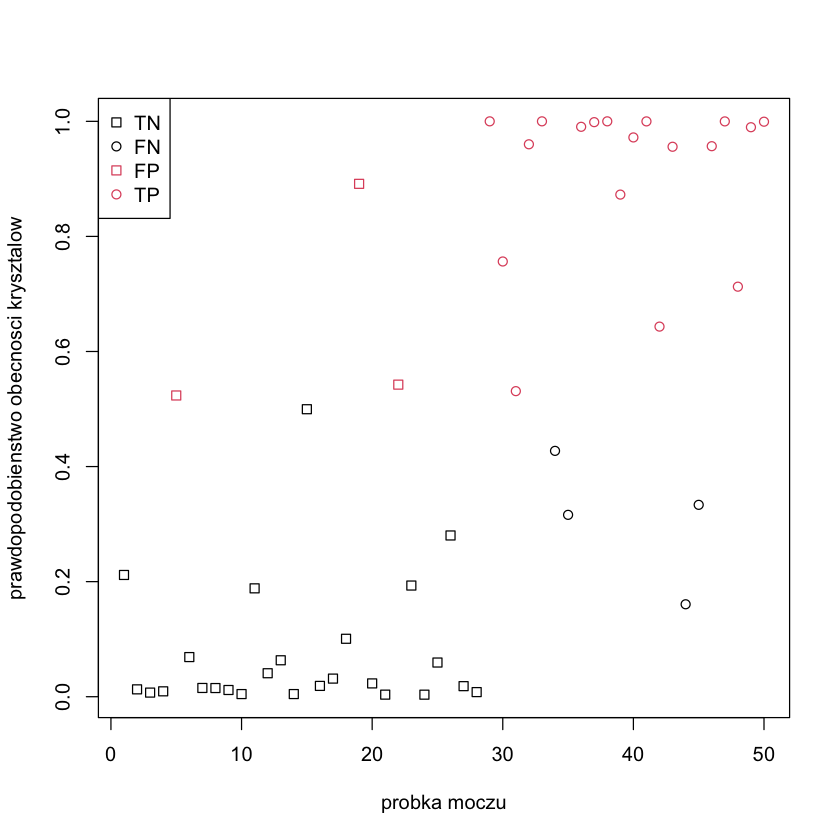

In [28]:
# wykres klasyfikacji obserwacji z podzbioru uczacego
plot(predykcja_log_podzbior_uczacy_7, pch = podzbior_uczacy_7$pres, col = wektor_predykcji_log_podzbior_uczacy_7 + 1, xlab = "probka moczu", ylab = "prawdopodobienstwo obecnosci krysztalow")
# dodanie legendy do wykresu
legend("topleft", c("TN", "FN", "FP", "TP"), pch = c(0, 1, 0, 1), col = c(1, 1, 2, 2))

Na powyższym wykresie na osi OX przedstawiono określone próbki moczu, a na osi OY prawdopodobieństwo obecności kryształów w moczu.
Znaczenie legendy:
- TN (czarny kwadrat) - próbki moczu bez kryształów zakwalifikowane poprawnie jako próbki moczu bez kryształów
- FN (czarne koło) - próbki moczu z kryształami zakwalifikowane niepoprawnie jako próbki moczu bez kryształów
- FP (czerwony kwadrat) - próbki moczu bez kryształów zakwalifikowane niepoprawnie jako próbki moczu z kryształami
- TP (czerwone koło) - próbki moczu z kryształami zakwalifikowane poprawnie jako próbki moczu z kryształami

In [29]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru testowego na podstawie wygenerowanego modelu regresji logistycznej
predykcja_log_podzbior_testowy_7 = predict(model_log_7_3, newdata = podzbior_testowy_7, type = "response")
predykcja_log_podzbior_testowy_7

1          3          6         11         15         17         25 
        NA 0.02264311 0.57830374 0.14692458 0.01035131 0.00838691 0.70353072 
        26         28         30         32         35         36         38 
0.51953631 0.26377290 0.01172850 0.83733012 0.02548071 0.23797705 0.60390717 
        43         44         45         46         52         53         54 
0.17557942 0.10173265 0.01654043 0.75688903 0.10142245 0.03400623 0.00878413 
        62         64         66         68         70         71         72 
0.51700986 0.99997789 0.05733437 0.65168736 0.79504612 0.99999998 0.99836912 
        78 
0.99514428

In [30]:
# liczba obserwacji z podzioru testowego, dla ktorych dokonalismy predykcji
liczba_predykcji_log_podzbior_testowy_7 = length(predykcja_log_podzbior_testowy_7)
liczba_predykcji_log_podzbior_testowy_7

[1] 29

In [31]:
# przygotowanie pustego wektora predykcji dla podzbioru testowego
wektor_predykcji_log_podzbior_testowy_7 = rep(0, liczba_predykcji_log_podzbior_testowy_7)

In [32]:
# zmiany wartosci w wektorze predykcji dla podzbioru testowego na okreslone wartosci prawdopodobienstwa
wektor_predykcji_log_podzbior_testowy_7[predykcja_log_podzbior_testowy_7 > 0.5] = 1
wektor_predykcji_log_podzbior_testowy_7

[1] 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1

In [33]:
# tabela predykcji dla podzbioru testowego
tabela_predykcji_log_podzbior_testowy_7 = table(True = podzbior_testowy_7$pres, Predicted = wektor_predykcji_log_podzbior_testowy_7)
tabela_predykcji_log_podzbior_testowy_7

    Predicted
True  0  1
   0 12  5
   1  4  8

In [34]:
# procent niepoprawnie dopasowanych obserwacji w podzbiorze testowym
blad_predykcji_log_podzbior_testowy_7 = (sum(tabela_predykcji_log_podzbior_testowy_7) - sum(diag(tabela_predykcji_log_podzbior_testowy_7))) / sum(tabela_predykcji_log_podzbior_testowy_7) * 100
blad_predykcji_log_podzbior_testowy_7

[1] 31.03448

Błąd klasyfikacji na próbie testowej wynosi 31.0344827586207%.

#### v) Skonstruuj klasyfikator w oparciu o metodę LDA bazując na próbie uczącej oraz porównaj jego błąd klasyfikacji na próbie testowej z błędem klasyfikacji klasyfikatora opartego na regresji logistycznej.

In [35]:
# wczytanie pakietu
#library(MASS)

In [36]:
# wykonanie modelu regresji liniowej
model_lda_7 = lda(pres ~ . -ph -osmo, data = podzbior_uczacy_7)
model_lda_7

Call:
lda(pres ~ . - ph - osmo, data = podzbior_uczacy_7)

Prior probabilities of groups:
        0         1 
0.5714286 0.4285714 

Group means:
   gravity     cond     urea     calc
0 1.015071 20.63929 236.7143 2.664643
1 1.022667 21.92857 323.7619 6.956667

Coefficients of linear discriminants:
                  LD1
gravity 234.122919197
cond     -0.069921332
urea     -0.008139128
calc      0.247040755

##### Otrzymany model regresji liniowej - klasyfikator:
$\textrm{pres} = 234.122919197 \cdot \textrm{gravity} - 0.069921332 \cdot \textrm{cond} - 0.008139128 \cdot \textrm{urea} + 0.247040755 \cdot \textrm{calc}$

In [37]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru testowego na podstawie wygenerowanego modelu regresji liniowej
predykcja_lda_podzbior_testowy_7 = predict(model_lda_7, newdata = podzbior_testowy_7[-1, ])
predykcja_lda_podzbior_testowy_7

,0,1
3,0.944123504,0.05587650
6,0.643974242,0.35602576
11,0.877917362,0.12208264
15,0.962192057,0.03780794
17,0.972589576,0.02741042
25,0.596033380,0.40396662
26,0.780048940,0.21995106
28,0.854041689,0.14595831
30,0.946951994,0.05304801
32,0.530526904,0.46947310


Z podzbioru testowego usuwamy pierwszą obserwację, dla której wychodzi wartość NA.

In [38]:
# tabela predykcji dla podzbioru testowego
tabela_predykcji_lda_podzbior_testowy_7 = table(True = podzbior_testowy_7$pres[-1], Predicted = predykcja_lda_podzbior_testowy_7$class)
tabela_predykcji_lda_podzbior_testowy_7

    Predicted
True  0  1
   0 16  0
   1  7  5

In [39]:
# procent niepoprawnie dopasowanych obserwacji w podzbiorze testowym
blad_predykcji_lda_zbior_testowy_7 = (sum(tabela_predykcji_lda_podzbior_testowy_7) - sum(diag(tabela_predykcji_lda_podzbior_testowy_7))) / sum(tabela_predykcji_lda_podzbior_testowy_7) * 100
blad_predykcji_lda_zbior_testowy_7

[1] 25

Błąd klasyfikacji klasyfikatora opartego na regresji liniowej dla próby testowej jest mniejszy o ponad 6% od błędu klasyfikacji klasyfikatora opartego na regresji logistycznej.

## Ćwiczenie 8
Plik $puls.txt$ zawiera dane dotyczące poziomów tętna spoczynkowego (niskie/wysokie) w grupie 92 pacjentów. W danych znajdują się następujące zmienne:
- $TetnoSpocz$ - poziom tętna spoczynkowego (niskie/wysokie)
- $Palacz$ - czy pacjent pali papierosy (0 - nie pali, 1 - pali)
- $Waga$ - waga w kilogramach

In [40]:
# wczytanie danych z naglowkami
puls = read.table("puls.txt", header = TRUE, sep = ";")
# wyswietlenie pierwszych wierszy naszych danych
head(puls)

,TetnoSpocz,Palacz,Waga
,<chr>,<int>,<int>
1,Niskie,1,51
2,Niskie,1,52
3,Niskie,1,57
4,Niskie,1,59
5,Niskie,1,60
6,Niskie,1,66


#### i) Dokonaj podziału obserwacji na podzbiór uczący (75% obserwacji, wybranych w sposób losowy) oraz zbiór testowy (pozostałe).

In [41]:
# liczba obserwacji w zbiorze danych
obserwacje_8 = nrow(puls)
obserwacje_8

[1] 92

In [42]:
# liczba obserwacji w podzbiorze uczacym
obserwacje_podzbior_uczacy = obserwacje_8 * 0.75
obserwacje_podzbior_uczacy

[1] 69

In [43]:
# wybranie losowych 69 obserwacji
#losowe_obserwacje_8 = sort(sample(1:92, 69, replace = FALSE))

Obserwacje zostały wylosowane wcześniej, aby przy każdym puszczaniu gotowego kodu próby ucząca i testowa miały identyczną zawartość, która wpływa na kolejne, wykonane poniżej kroki.

In [44]:
# wektor losowych obserwacji
losowe_obserwacje_8 = c(1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 52, 55, 56, 58, 59, 63, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92)

In [45]:
# przygotowanie podzbioru uczacego
podzbior_uczacy_8 = puls[losowe_obserwacje_8, ]
podzbior_uczacy_8

,TetnoSpocz,Palacz,Waga
,<chr>,<int>,<int>
1,Niskie,1,51
2,Niskie,1,52
3,Niskie,1,57
4,Niskie,1,59
5,Niskie,1,60
7,Niskie,0,68
8,Niskie,0,68
9,Niskie,0,68
10,Niskie,0,68


In [46]:
# przygotowanie podzbioru testowego
podzbior_testowy_8 = puls[-losowe_obserwacje_8, ]
podzbior_testowy_8

,TetnoSpocz,Palacz,Waga
,<chr>,<int>,<int>
6,Niskie,1,66
20,Niskie,0,76
32,Niskie,0,82
33,Niskie,0,82
35,Niskie,0,82
37,Niskie,0,83
45,Niskie,0,85
50,Niskie,0,87
51,Niskie,0,88


#### ii) Dopasuj model regresji logistycznej bazując na podzbiorze uczącym, przyjmując za zmienną objaśnianą $TetnoSpocz$.

Przed wykonaniem modelu regresji logistycznej musimy zamienić wartości dla zmiennej objaśnianej $TetnoSpocz$ następująco:
- Niskie jako: 0
- Wysokie jako: 1

Musimy także zmienić typ kolumny z tekstowego $<chr>$ na numeryczny $<int>$.

In [47]:
podzbior_uczacy_8[podzbior_uczacy_8 == "Niskie"] <- 0
podzbior_uczacy_8[podzbior_uczacy_8 == "Wysokie"] <- 1
podzbior_uczacy_8$TetnoSpocz <- as.integer(podzbior_uczacy_8$TetnoSpocz)
podzbior_uczacy_8

,TetnoSpocz,Palacz,Waga
,<int>,<int>,<int>
1,0,1,51
2,0,1,52
3,0,1,57
4,0,1,59
5,0,1,60
7,0,0,68
8,0,0,68
9,0,0,68
10,0,0,68


In [48]:
podzbior_testowy_8[podzbior_testowy_8 == "Niskie"] <- 0
podzbior_testowy_8[podzbior_testowy_8 == "Wysokie"] <- 1
podzbior_testowy_8$TetnoSpocz <- as.integer(podzbior_testowy_8$TetnoSpocz)
podzbior_testowy_8

,TetnoSpocz,Palacz,Waga
,<int>,<int>,<int>
6,0,1,66
20,0,0,76
32,0,0,82
33,0,0,82
35,0,0,82
37,0,0,83
45,0,0,85
50,0,0,87
51,0,0,88


Przekazujemy w ten sposób zmienną z dwoma argumentami liczbowymi (0 i 1).

In [49]:
# wykonanie modelu regresji logistycznej
model_log_8_1 = glm(TetnoSpocz ~ ., data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej
summary(model_log_8_1)


Call:
glm(formula = TetnoSpocz ~ ., family = binomial(), data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0681  -0.8415  -0.5711   0.8091   2.5243  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.37350    1.92656  -3.308 0.000939 ***
Palacz       0.05535    0.59487   0.093 0.925865    
Waga         0.06728    0.02239   3.005 0.002652 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 74.422  on 66  degrees of freedom
AIC: 80.422

Number of Fisher Scoring iterations: 4


##### Otrzymany model regresji logistycznej - klasyfikator:
$\textrm{TetnoSpocz} = {1 \over 1 + exp(-(-6.37350 + 0.05535 \cdot \textrm{Palacz} + 0.06728 \cdot \textrm{Waga}))}$

#### iii) Stosując krokową procedurę wyboru modelu zdecyduj, które zmienne powinny pozostać w modelu.

Najwyższą nieistotną statystycznie p-wartość statystyki testowej ma zmienna $Palacz$, którą usuwamy z modelu.

In [50]:
# wykonanie modelu regresji logistycznej bez zmiennej Palacz
model_log_8_2 = glm(TetnoSpocz ~ . -Palacz, data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej bez zmiennej Palacz
summary(model_log_8_2)


Call:
glm(formula = TetnoSpocz ~ . - Palacz, family = binomial(), data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0535  -0.8482  -0.5760   0.8214   2.5176  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.35801    1.92149  -3.309 0.000937 ***
Waga         0.06733    0.02242   3.004 0.002669 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 74.431  on 67  degrees of freedom
AIC: 78.431

Number of Fisher Scoring iterations: 4


Pozostała zmienna $Waga$ (oraz wyraz wolny $(Intercept)$) są istotne statystycznie.

#### iv) Dopasuj model regresji logistycznej bazując na podzbiorze uczącym, uwzględniający interakcję pomiędzy zmiennymi objaśniającymi.

In [51]:
# wykonanie modelu regresji logistycznej z interakcją pomiędzy zmiennymi
model_log_8_3 = glm(TetnoSpocz ~ Palacz * Waga, data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej z interakcją pomiędzy zmiennymi
summary(model_log_8_3)


Call:
glm(formula = TetnoSpocz ~ Palacz * Waga, family = binomial(), 
    data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3305  -0.8725  -0.2753   0.5390   2.0844  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -2.74779    1.98890  -1.382    0.167  
Palacz      -23.95039   12.37648  -1.935    0.053 .
Waga          0.02413    0.02361   1.022    0.307  
Palacz:Waga   0.27644    0.13981   1.977    0.048 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.297  on 65  degrees of freedom
AIC: 71.297

Number of Fisher Scoring iterations: 7


W modelu regresji logistycznej uwzględniającym interakcję pomiędzy zmiennymi objaśniającymi istotność statystyczną obserwujemy tylko przy zmiennej dotyczącej interakcji zmiennych $Palacz$ oraz $Waga$.

##### Otrzymany model regresji logistycznej - klasyfikator:
$\textrm{TetnoSpocz} = {1 \over 1 + exp(-(-2.74779 - 23.95039 \cdot \textrm{Palacz} + 0.02413 \cdot \textrm{Waga} + 0.27644 \cdot \textrm{Palacz} : \textrm{Waga})}$

#### v) Przeanalizuj modele zawierające jako zmienne objaśniające następujące zestawy zmiennych:
#### M1: $Palacz$, $Waga$, $Palacz$*$Waga$
#### M2: $Waga$, $Palacz$*$Waga$
#### M3: $Palacz$, $Palacz$*$Waga$
#### M4: $Palacz$*$Waga$
#### Który z tych modeli zawiera tylko istotne zmienne objaśniające?

In [52]:
# wykonanie modelu regresji logistycznej M1
model_log_M1 = glm(TetnoSpocz ~ Palacz + Waga + Palacz:Waga, data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej M1
summary(model_log_M1)


Call:
glm(formula = TetnoSpocz ~ Palacz + Waga + Palacz:Waga, family = binomial(), 
    data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3305  -0.8725  -0.2753   0.5390   2.0844  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -2.74779    1.98890  -1.382    0.167  
Palacz      -23.95039   12.37648  -1.935    0.053 .
Waga          0.02413    0.02361   1.022    0.307  
Palacz:Waga   0.27644    0.13981   1.977    0.048 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.297  on 65  degrees of freedom
AIC: 71.297

Number of Fisher Scoring iterations: 7


In [53]:
# wykonanie modelu regresji logistycznej M2
model_log_M2 = glm(TetnoSpocz ~ Waga + Palacz:Waga, data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej M2
summary(model_log_M2)


Call:
glm(formula = TetnoSpocz ~ Waga + Palacz:Waga, family = binomial(), 
    data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1407  -0.8194  -0.6030   0.8038   2.5359  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.327490   1.907432  -3.317 0.000909 ***
Waga         0.065690   0.022425   2.929 0.003397 ** 
Waga:Palacz  0.003650   0.006928   0.527 0.598297    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 74.153  on 66  degrees of freedom
AIC: 80.153

Number of Fisher Scoring iterations: 4


In [54]:
# wykonanie modelu regresji logistycznej M3
model_log_M3 = glm(TetnoSpocz ~ Palacz + Palacz:Waga, data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej M3
summary(model_log_M3)


Call:
glm(formula = TetnoSpocz ~ Palacz + Palacz:Waga, family = binomial(), 
    data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3305  -0.8752  -0.2753   0.5390   2.0844  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.7621     0.3237  -2.355   0.0185 *
Palacz      -25.9360    12.2199  -2.122   0.0338 *
Palacz:Waga   0.3006     0.1378   2.181   0.0292 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 64.384  on 66  degrees of freedom
AIC: 70.384

Number of Fisher Scoring iterations: 7


In [55]:
# wykonanie modelu regresji logistycznej M4
model_log_M4 = glm(TetnoSpocz ~ Palacz:Waga, data = podzbior_uczacy_8, family = binomial())
# podsumowanie modelu regresji logistycznej M4
summary(model_log_M4)


Call:
glm(formula = TetnoSpocz ~ Palacz:Waga, family = binomial(), 
    data = podzbior_uczacy_8)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0195  -0.8078  -0.8078   1.3300   1.5992  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.952466   0.331679  -2.872  0.00408 **
Palacz:Waga  0.006323   0.006394   0.989  0.32271   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 85.416  on 67  degrees of freedom
AIC: 89.416

Number of Fisher Scoring iterations: 4


W modelu regresji logistycznej M1 ze zmiennymi objaśniającymi $Palacz$, $Waga$ oraz ich interakcją nie obserwujemy istotności statystycznej dla wszystkich jego składników (tylko dla interakcji zmiennych $Palacz$ i $Waga$).

W modelu regresji logistycznej M2 ze zmiennymi objaśniającymi $Waga$ i interakcją pomiędzy zmiennymi $Palacz$ oraz $Waga$ nie obserwujemy istotności statystycznej dla wszystkich jego składników (brak istotności dla interakcji zmiennych $Palacz$ i $Waga$).

W modelu regresji logistycznej M3 ze zmiennymi objaśniającymi $Palacz$ i interakcją pomiędzy zmiennymi $Palacz$ oraz $Waga$ obserwujemy istotność statystyczną dla wszystkich jego składników.

W modelu regresji logistycznej M4 z interakcją pomiędzy zmiennymi $Palacz$ oraz $Waga$ nie obserwujemy istotności statystycznej dla wszystkich jego składników (brak istotności dla interakcji zmiennych $Palacz$ i $Waga$).

Tylko model regresji logistycznej M3 zawiera wszystkie istotne zmienne objaśniające.

#### vi) Dla pełnego modelu bez interakcji i modelu wskazanego w punkcie v) skonstruuj klasyfikatory w oparciu o próbę uczącą. Przedstaw na rysunku klasyfikację dokonaną przez oba klasyfikatory. Wyznacz błąd klasyfikacji na próbie testowej.

##### Otrzymany pełny model regresji logistycznej bez interakcji - klasyfikator:
$\textrm{TetnoSpocz} = {1 \over 1 + exp(-(-6.37350 + 0.05535 \cdot \textrm{Palacz} + 0.06728 \cdot \textrm{Waga}))}$

##### Otrzymany model regresji logistycznej z interakcją wskazany w punkcie v) - klasyfikator:
$\textrm{TetnoSpocz} = {1 \over 1 + exp(-(-0.7621 - 25.9360 \cdot \textrm{Palacz} + 0.3006 \cdot \textrm{Palacz:Waga}))}$

In [56]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru uczacego na podstawie pelnego modelu regresji logistycznej
predykcja_log_podzbior_uczacy_model_pelny_8 = predict(model_log_8_1, newdata = podzbior_uczacy_8, type = "response")
predykcja_log_podzbior_uczacy_model_pelny_8

1          2          3          4          5          7          8 
0.05281871 0.05628797 0.07706449 0.08719722 0.09270353 0.14207796 0.14207796 
         9         10         11         12         13         14         15 
0.14207796 0.14207796 0.14895952 0.14895952 0.14895952 0.15047855 0.15928363 
        16         17         18         19         21         22         23 
0.21895061 0.21895061 0.21895061 0.21895061 0.23279871 0.23279871 0.24503130 
        24         25         26         27         28         29         30 
0.24503130 0.25541485 0.25769076 0.25769076 0.25769076 0.27076970 0.29814403 
        31         34         36         38         39         40         41 
0.29814403 0.29814403 0.30985456 0.31241203 0.32704468 0.32704468 0.32704468 
        42         43         44         46         47         48         49 
0.33934154 0.34202177 0.34202177 0.35732056 0.35732056 0.35732056 0.37291583 
        52         55         56         58         59         63         66 
0.38878000 0.38878000 0.38878000 0.40201143 0.43474391 0.43767847 0.47102753 
        67         68         70         71         72         73         74 
0.47102753 0.48483774 0.48781863 0.51846704 0.50463726 0.51846704 0.55487894 
        75         77         79         81         82         84         85 
0.60116587 0.63295030 0.72083412 0.74934176 0.77376154 0.82722659 0.04133503 
        86         87         88         89         90         92 
0.06064689 0.06459525 0.08289102 0.11231833 0.30985456 0.78330416

In [57]:
# liczba obserwacji z podzioru uczacego, dla ktorych dokonalismy predykcji wzgledem pelnego modelu regresji logistycznej
liczba_predykcji_log_podzbior_uczacy_model_pelny_8 = length(predykcja_log_podzbior_uczacy_model_pelny_8)
liczba_predykcji_log_podzbior_uczacy_model_pelny_8

[1] 69

In [58]:
# przygotowanie pustego wektora predykcji dla podzbioru uczacego wzgledem pelnego modelu regresji logistycznej
wektor_predykcji_log_podzbior_uczacy_model_pelny_8 = rep(0, liczba_predykcji_log_podzbior_uczacy_model_pelny_8)

In [59]:
# zmiany wartosci w wektorze predykcji dla podzbioru uczacego na okreslone wartosci prawdopodobienstwa wzgledem pelnego modelu regresji logistycznej
wektor_predykcji_log_podzbior_uczacy_model_pelny_8[predykcja_log_podzbior_uczacy_model_pelny_8 > 0.5] = 1
wektor_predykcji_log_podzbior_uczacy_model_pelny_8

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1

In [60]:
# tabela predykcji dla podzbioru uczacego wzgledem pelnego modelu regresji logistycznej
tabela_predykcji_log_podzbior_uczacy_model_pelny_8 = table(True = podzbior_uczacy_8$TetnoSpocz, Predicted = wektor_predykcji_log_podzbior_uczacy_model_pelny_8)
tabela_predykcji_log_podzbior_uczacy_model_pelny_8

    Predicted
True  0  1
   0 47  0
   1 11 11

In [61]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru uczacego na podstawie modelu regresji logistycznej z interakcja
predykcja_log_podzbior_uczacy_model_interakcja_8 = predict(model_log_M3, newdata = podzbior_uczacy_8, type = "response")
predykcja_log_podzbior_uczacy_model_interakcja_8

1            2            3            4            5            7 
1.154582e-05 1.559403e-05 7.008277e-05 1.278371e-04 1.726524e-04 3.181818e-01 
           8            9           10           11           12           13 
3.181818e-01 3.181818e-01 3.181818e-01 1.908536e-03 1.908536e-03 1.908536e-03 
          14           15           16           17           18           19 
3.181818e-01 3.181818e-01 1.543552e-02 1.543552e-02 1.543552e-02 1.543552e-02 
          21           22           23           24           25           26 
3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.718979e-02 3.181818e-01 
          27           28           29           30           31           34 
3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 
          36           38           39           40           41           42 
1.138961e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 1.899384e-01 
          43           44           46           47           48           49 
3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 
          52           55           56           58           59           63 
3.181818e-01 3.181818e-01 3.181818e-01 4.382824e-01 5.873453e-01 3.181818e-01 
          66           67           68           70           71           72 
3.181818e-01 3.181818e-01 7.781137e-01 3.181818e-01 8.648119e-01 3.181818e-01 
          73           74           75           77           79           81 
8.648119e-01 3.181818e-01 9.663882e-01 9.812903e-01 9.968689e-01 3.181818e-01 
          82           84           85           86           87           88 
3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 3.181818e-01 
          89           90           92 
3.181818e-01 1.138961e-01 9.993016e-01

In [62]:
# liczba obserwacji z podzioru uczacego, dla ktorych dokonalismy predykcji wzgledem modelu regresji logistycznej z interakcja
liczba_predykcji_log_podzbior_uczacy_model_interakcja_8 = length(predykcja_log_podzbior_uczacy_model_interakcja_8)
liczba_predykcji_log_podzbior_uczacy_model_interakcja_8

[1] 69

In [63]:
# przygotowanie pustego wektora predykcji dla podzbioru uczacego wzgledem modelu regresji logistycznej z interakcja
wektor_predykcji_log_podzbior_uczacy_model_interakcja_8 = rep(0, liczba_predykcji_log_podzbior_uczacy_model_interakcja_8)

In [64]:
# zmiany wartosci w wektorze predykcji dla podzbioru uczacego na okreslone wartosci prawdopodobienstwa wzgledem modelu regresji logistycznej z interakcja
wektor_predykcji_log_podzbior_uczacy_model_interakcja_8[predykcja_log_podzbior_uczacy_model_interakcja_8 > 0.5] = 1
wektor_predykcji_log_podzbior_uczacy_model_interakcja_8

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1

In [65]:
# tabela predykcji dla podzbioru uczacego wzgledem modelu regresji logistycznej z interakcja
tabela_predykcji_log_podzbior_uczacy_model_interakcja_8 = table(True = podzbior_uczacy_8$TetnoSpocz, Predicted = wektor_predykcji_log_podzbior_uczacy_model_interakcja_8)
tabela_predykcji_log_podzbior_uczacy_model_interakcja_8

    Predicted
True  0  1
   0 46  1
   1 15  7

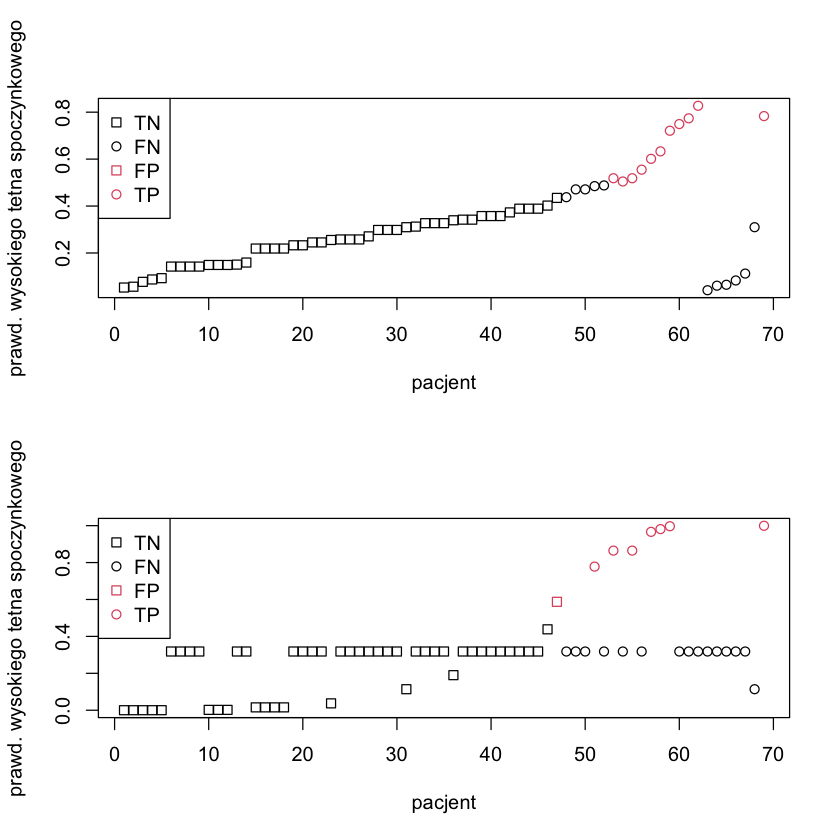

In [66]:
# porownanie wykresow klasyfikacji obserwacji z podzbioru uczacego dla obu modeli
# przygotowanie powierzchni pod oba wykresy
par(mfrow = c(2, 1))

# wykres klasyfikacji obserwacji z podzbioru uczacego wzgledem pelnego modelu regresji logistycznej
plot(predykcja_log_podzbior_uczacy_model_pelny_8, pch = podzbior_uczacy_8$TetnoSpocz, col = wektor_predykcji_log_podzbior_uczacy_model_pelny_8 + 1, xlab = "pacjent", ylab = "prawd. wysokiego tetna spoczynkowego")
# dodanie legendy do wykresu
legend("topleft", c("TN", "FN", "FP", "TP"), pch = c(0, 1, 0, 1), col = c(1, 1, 2, 2))

# wykres klasyfikacji obserwacji z podzbioru uczacego wzgledem modelu regresji logistycznej z interakcja
plot(predykcja_log_podzbior_uczacy_model_interakcja_8, pch = podzbior_uczacy_8$TetnoSpocz, col = wektor_predykcji_log_podzbior_uczacy_model_interakcja_8 + 1, xlab = "pacjent", ylab = "prawd. wysokiego tetna spoczynkowego")
# dodanie legendy do wykresu
legend("topleft", c("TN", "FN", "FP", "TP"), pch = c(0, 1, 0, 1), col = c(1, 1, 2, 2))

Na powyższych wykresach na osi OX przedstawiono określonych pacjentów, a na osi OY prawdopodobieństwo wysokiego tętna spoczynkowego.
Znaczenie legendy:
- TN (czarny kwadrat) - pacjenci z niskim tętnem spoczynkowym zakwalifikowani poprawnie jako pacjenci z niskim tętnem spoczynkowym
- FN (czarne koło) - pacjenci z niskim tętnem spoczynkowym zakwalifikowani niepoprawnie jako pacjenci z wysokim tętnem spoczynkowym
- FP (czerwony kwadrat) - pacjenci z wysokim tętnem spoczynkowym zakwalifikowani niepoprawnie jako pacjenci z niskim tętnem spoczynkowym
- TP (czerwone koło) - pacjenci z wysokim tętnem spoczynkowym zakwalifikowani poprawnie jako pacjenci z wysokim tętnem spoczynkowym

In [67]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru testowego na podstawie pelnego modelu regresji logistycznej
predykcja_log_podzbior_testowy_model_pelny_8 = predict(model_log_8_1, newdata = podzbior_testowy_8, type = "response")
predykcja_log_podzbior_testowy_model_pelny_8

6        20        32        33        35        37        45        50 
0.1326930 0.2209980 0.2981440 0.2981440 0.2981440 0.3124120 0.3420218 0.3729158 
       51        53        54        57        60        61        62        64 
0.3887800 0.3887800 0.3887800 0.3887800 0.4513452 0.4513452 0.4376785 0.4376785 
       65        69        76        78        80        83        91 
0.4513452 0.4878186 0.6199986 0.6511531 0.7493418 0.8272266 0.3393415

In [68]:
# liczba obserwacji z podzioru testowego, dla ktorych dokonalismy predykcji wzgledem pelnego modelu regresji logistycznej
liczba_predykcji_log_podzbior_testowy_model_pelny_8 = length(predykcja_log_podzbior_testowy_model_pelny_8)
liczba_predykcji_log_podzbior_testowy_model_pelny_8

[1] 23

In [69]:
# przygotowanie pustego wektora predykcji dla podzbioru testowego wzgledem pelnego modelu regresji logistycznej
wektor_predykcji_log_podzbior_testowy_model_pelny_8 = rep(0, liczba_predykcji_log_podzbior_testowy_model_pelny_8)

In [70]:
# zmiany wartosci w wektorze predykcji dla podzbioru testowego na okreslone wartosci prawdopodobienstwa wzgledem pelnego modelu regresji logistycznej
wektor_predykcji_log_podzbior_testowy_model_pelny_8[predykcja_log_podzbior_testowy_model_pelny_8 > 0.5] = 1
wektor_predykcji_log_podzbior_testowy_model_pelny_8

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0

In [71]:
# tabela predykcji dla podzbioru testowego wzgledem pelnego modelu regresji logistycznej
tabela_predykcji_log_podzbior_testowy_model_pelny_8 = table(True = podzbior_testowy_8$TetnoSpocz, Predicted = wektor_predykcji_log_podzbior_testowy_model_pelny_8)
tabela_predykcji_log_podzbior_testowy_model_pelny_8

    Predicted
True  0  1
   0 14  0
   1  5  4

In [72]:
# procent niepoprawnie dopasowanych obserwacji w podzbiorze testowym wzgledem pelnego modelu regresji logistycznej
blad_predykcji_log_podzbior_testowy_model_pelny_8 = (sum(tabela_predykcji_log_podzbior_testowy_model_pelny_8) - sum(diag(tabela_predykcji_log_podzbior_testowy_model_pelny_8))) / sum(tabela_predykcji_log_podzbior_testowy_model_pelny_8) * 100
blad_predykcji_log_podzbior_testowy_model_pelny_8

[1] 21.73913

Błąd klasyfikacji na próbie testowej względem pełnego modelu regresji logistycznej wynosi 21.7391304347826%.

In [73]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru testowego na podstawie modelu regresji logistycznej z interakcja
predykcja_log_podzbior_testowy_model_interakcja_8 = predict(model_log_M3, newdata = podzbior_testowy_8, type = "response")
predykcja_log_podzbior_testowy_model_interakcja_8

6          20          32          33          35          37 
0.001047139 0.318181818 0.318181818 0.318181818 0.318181818 0.318181818 
         45          50          51          53          54          57 
0.318181818 0.318181818 0.318181818 0.318181818 0.318181818 0.318181818 
         60          61          62          64          65          69 
0.657814552 0.657814552 0.318181818 0.318181818 0.657814552 0.318181818 
         76          78          80          83          91 
0.318181818 0.318181818 0.318181818 0.318181818 0.189938435

In [74]:
# liczba obserwacji z podzioru testowego, dla ktorych dokonalismy predykcji wzgledem modelu regresji logistycznej z interakcja
liczba_predykcji_log_podzbior_testowy_model_interakcja_8 = length(predykcja_log_podzbior_testowy_model_interakcja_8)
liczba_predykcji_log_podzbior_testowy_model_interakcja_8

[1] 23

In [75]:
# przygotowanie pustego wektora predykcji dla podzbioru testowego wzgledem modelu regresji logistycznej z interakcja
wektor_predykcji_log_podzbior_testowy_model_interakcja_8 = rep(0, liczba_predykcji_log_podzbior_testowy_model_interakcja_8)

In [76]:
# zmiany wartosci w wektorze predykcji dla podzbioru testowego na okreslone wartosci prawdopodobienstwa wzgledem modelu regresji logistycznej z interakcja
wektor_predykcji_log_podzbior_testowy_model_interakcja_8[predykcja_log_podzbior_testowy_model_interakcja_8 > 0.5] = 1
wektor_predykcji_log_podzbior_testowy_model_interakcja_8

[1] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0

In [77]:
# tabela predykcji dla podzbioru testowego wzgledem modelu regresji logistycznej z interakcja
tabela_predykcji_log_podzbior_testowy_model_interakcja_8 = table(True = podzbior_testowy_8$TetnoSpocz, Predicted = wektor_predykcji_log_podzbior_testowy_model_interakcja_8)
tabela_predykcji_log_podzbior_testowy_model_interakcja_8

    Predicted
True  0  1
   0 12  2
   1  8  1

In [78]:
# procent niepoprawnie dopasowanych obserwacji w podzbiorze testowym wzgledem modelu regresji logistycznej z interakcja
blad_predykcji_log_podzbior_testowy_model_interakcja_8 = (sum(tabela_predykcji_log_podzbior_testowy_model_interakcja_8) - sum(diag(tabela_predykcji_log_podzbior_testowy_model_interakcja_8))) / sum(tabela_predykcji_log_podzbior_testowy_model_interakcja_8) * 100
blad_predykcji_log_podzbior_testowy_model_interakcja_8

[1] 43.47826

Błąd klasyfikacji na próbie testowej względem modelu regresji logistycznej z interakcją wynosi 43.4782608695652%.

Różnica pomiędzy błędami klasyfikacji na próbie testowej wynosi ponad 21% na korzyść pełnego modelu regresji logistycznej (bez interakcji). Co ciekawe błąd klasyfikacji dotyczący modelu regresji logistycznej z interakcją jest dokładnie 2 razy większy niż pełnego modelu regresji logistycznej.

#### vii) Skonstruuj klasyfikatory w oparciu o metodę LDA bazując na próbie uczącej oraz porównaj ich błędy klasyfikacji na próbie testowej z błędami klasyfikacji klasyfikatorów opartych na regresji logistycznej. Skomentuj uzyskane wyniki.

In [79]:
# wczytanie pakietu
#library(MASS)

In [80]:
# wykonanie modelu regresji liniowej
model_lda_8 = lda(TetnoSpocz ~ ., data = podzbior_uczacy_8)
model_lda_8

Call:
lda(TetnoSpocz ~ ., data = podzbior_uczacy_8)

Prior probabilities of groups:
        0         1 
0.6811594 0.3188406 

Group means:
     Palacz     Waga
0 0.3617021 76.65957
1 0.3636364 89.72727

Coefficients of linear discriminants:
              LD1
Palacz 0.13289485
Waga   0.07056895

##### Otrzymany model regresji liniowej - klasyfikator:
$\textrm{TetnoSpocz} = 0.13289485 \cdot \textrm{Palacz} + 0.07056895 \cdot \textrm{Waga}$

In [81]:
# wykonanie predykcji prawdopodobienstwa dla podzbioru testowego na podstawie wygenerowanego modelu regresji liniowej
predykcja_lda_podzbior_testowy_8 = predict(model_lda_8, newdata = podzbior_testowy_8)
predykcja_lda_podzbior_testowy_8

,0,1
6,0.8581712,0.1418288
20,0.7810540,0.2189460
32,0.7070810,0.2929190
33,0.7070810,0.2929190
35,0.7070810,0.2929190
37,0.6934194,0.3065806
45,0.6650686,0.3349314
50,0.6354743,0.3645257
51,0.6202665,0.3797335
53,0.6202665,0.3797335


In [82]:
# tabela predykcji dla podzbioru testowego na podstawie wygenerowanego modelu regresji liniowej
tabela_predykcji_lda_podzbior_testowy_8 = table(True = podzbior_testowy_8$TetnoSpocz, Predicted = predykcja_lda_podzbior_testowy_8$class)
tabela_predykcji_lda_podzbior_testowy_8

    Predicted
True  0  1
   0 14  0
   1  5  4

In [83]:
# procent niepoprawnie dopasowanych obserwacji w podzbiorze testowym na podstawie wygenerowanego modelu regresji liniowej
blad_predykcji_lda_zbior_testowy_8 = (sum(tabela_predykcji_lda_podzbior_testowy_8) - sum(diag(tabela_predykcji_lda_podzbior_testowy_8))) / sum(tabela_predykcji_lda_podzbior_testowy_8) * 100
blad_predykcji_lda_zbior_testowy_8

[1] 21.73913

Błąd klasyfikacji klasyfikatora opartego na regresji liniowej dla próby testowej wynosi 21.7391304347826%.

Błąd klasyfikacji klasyfikatora opartego na regresji liniowej wynosi dokładnie tyle samo ile klasyfikatora opartego na pełnym modelu regresji logistycznej (ich tabele dotyczące predykcji są identyczne - wskazują na taką samą liczbę błędów). Oba są lepsze o ponad 21% niż klasyfikator oparty na regresji liniowej z interakcją.